## Description

 This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Our goal is to predict Attrition_Flag.

#### Following is the Data Dictionary for Credit Card dataset:

- Client - number - Unique identifier for the customer holding the account

- Attrition_FlagInternal - event (customer activity) variable - if the account is closed then 1 else 0

- Customer_AgeDemographic - variable - Customer's Age in Years

- GenderDemographic - variable - M=Male, F=Female

- Dependent_count - Demographic variable - Number of dependents

- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown

- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

- Monthsonbook - Period of relationship with bank

- TotalRelationshipCount - Total no. of products held by the customer

- MonthsInactive12_mon - No. of months inactive in the last 12 months

- ContactsCount12_mon - No. of Contacts in the last 12 months

- Credit_Limit - Credit Limit on the Credit Card

- TotalRevolvingBal - Total Revolving Balance on the Credit Card

- AvgOpenTo_Buy - Open to Buy Credit Line (Average of last 12 months)

- TotalAmtChngQ4Q1 - Change in Transaction Amount (Q4 over Q1)

- TotalTransAmt - Total Transaction Amount (Last 12 months)

- TotalTransCt - Total Transaction Count (Last 12 months)

- TotalCtChngQ4Q1 - Change in Transaction Count (Q4 over Q1)

- AvgUtilizationRatio - Average Card Utilization Ratio

- NaiveBayesClassifierAttritionFlagCardCategoryContactsCount12monDependentcountEducationLevelMonthsInactive12mon_1 - Naive Bayes - Should be dropped

- NaiveBayesClassifierAttritionFlagCardCategoryContactsCount12monDependentcountEducationLevelMonthsInactive12mon_2 - Naive Bayes - Should be dropped

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('BankChurners.csv', sep=',')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
#Drop columns that should be dropped
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.shape

(10127, 21)

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
#Check for missing values
df.isna().sum().sort_values(ascending=False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

There are not any missing values in the dataset, now we could prepare data.

## What metric to use

In [8]:
tmp = df.groupby('Attrition_Flag').Attrition_Flag.count().reset_index(name = 'Count')
tmp

,Attrition_Flag,Count
0,Attrited Customer,1627
1,Existing Customer,8500


As we could see, the nuber of customers in categories has high difference, therefor, we will use Stratified Cross validation. As a metric, we will use accuracy metric, because it is not obvious which type of customers are more important for us.

Each of the metrics is important for different type of problem,  for example if we need minimal number of false positive, we will use precision score. On the other hand, if we need to minimalize false negative results (for example covid tests), we will use recall score.

## Encoding categorical attributes

In [9]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [10]:
list(df.select_dtypes(['object']).columns)

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

We see that some attributes are categorical, now we have to convert them to numerical by using encoding. We have to look on each of them and decide which encoder will be optimal (one-hot, ordinal, ...).

In [11]:
#Attrition flag
np.unique(df.Attrition_Flag)

array(['Attrited Customer', 'Existing Customer'], dtype=object)

Attribute Attrition flag has just two different values, Attrited and Existing customer, therefor we could encode Attrited_Customer as 0, and Existing_Customer as 1.

In [12]:
#df.Attrition_Flag
df.Attrition_Flag = (df.Attrition_Flag == 'Existing Customer').astype(int)

In [13]:
#Gender
np.unique(df.Gender)

array(['F', 'M'], dtype=object)

For gender, we could use similar encoding as for Attrition_Flag (0 = Female, 1 = Male)

In [14]:
df.Gender = (df.Gender == 'M').astype(int)

In [15]:
#Education_Level
np.unique(df.Education_Level)

array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown'], dtype=object)

We will use ordinal encoder for Education_Level.

In [16]:
education_encoder = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Doctorate', 'Post-Graduate']])
df.Education_Level = education_encoder.fit_transform(df[['Education_Level']])

In [17]:
#Marital_Status
np.unique(df.Marital_Status)

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

We will use one_hot encoding for Marital_status, because we could not put them in any logical order.

In [18]:
df = pd.concat([df,pd.get_dummies(df['Marital_Status'], prefix='Marital_Status')], axis=1).drop('Marital_Status', axis=1)

In [19]:
#Income_Category
np.unique(df.Income_Category)

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

For Income_Category, we could easily use ordinal encoder.

In [20]:
income_encoder = OrdinalEncoder(categories=[['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']])
df.Income_Category = income_encoder.fit_transform(df[['Income_Category']])

In [21]:
#Card_Category
np.unique(df.Card_Category)

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

We will use ordinal encoding for Card_category, because there is a logical order in card categories (Blue, Silver, Gold, Platinum).

In [22]:
card_category_encoder = OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']])
df.Card_Category = card_category_encoder.fit_transform(df[['Card_Category']])

Let's look on the dataset now, after encoding is done.

In [23]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2.0,3.0,0.0,39,5,...,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0
1,818770008,1,49,0,5,4.0,1.0,0.0,44,6,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,713982108,1,51,1,3,4.0,4.0,0.0,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0
3,769911858,1,40,0,4,2.0,1.0,0.0,34,3,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,709106358,1,40,1,3,1.0,3.0,0.0,21,5,...,4716.0,2.175,816,28,2.500,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,4.0,2.0,0.0,40,3,...,2152.0,0.703,15476,117,0.857,0.462,0,0,1,0
10123,710638233,0,41,1,2,0.0,2.0,0.0,25,4,...,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0
10124,716506083,0,44,0,1,2.0,1.0,0.0,36,5,...,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0
10125,717406983,0,30,1,2,4.0,2.0,0.0,36,4,...,5281.0,0.535,8395,62,0.722,0.000,0,0,0,1


In [24]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level             float64
Income_Category             float64
Card_Category               float64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Marital_Status_Divorced       uint8
Marital_Status_Married        uint8
Marital_Status_Single         uint8
Marital_Status_Unknown        uint8
dtype: object

In [25]:
np.unique(df.CLIENTNUM).shape[0]

10127

As we could see above, CLIENTNUMBER is unique for each customer, and it does not make a sense to use it for classification.


In [26]:
df = df.drop(columns=['CLIENTNUM'])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,2.0,3.0,0.0,39,5,1,...,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0
1,1,49,0,5,4.0,1.0,0.0,44,6,1,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,1,51,1,3,4.0,4.0,0.0,36,4,1,...,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0
3,1,40,0,4,2.0,1.0,0.0,34,3,4,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,1,40,1,3,1.0,3.0,0.0,21,5,1,...,4716.0,2.175,816,28,2.500,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,4.0,2.0,0.0,40,3,2,...,2152.0,0.703,15476,117,0.857,0.462,0,0,1,0
10123,0,41,1,2,0.0,2.0,0.0,25,4,2,...,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0
10124,0,44,0,1,2.0,1.0,0.0,36,5,3,...,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0
10125,0,30,1,2,4.0,2.0,0.0,36,4,3,...,5281.0,0.535,8395,62,0.722,0.000,0,0,0,1


## Scaling the data

Because later, we will use different algorithms (also a neuron network), we need to convert all the attributes to a float64, and use MinMaxScaling.

In [27]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1.0,0.404255,1.0,0.6,0.333333,0.6,0.000000,0.604651,0.8,0.166667,...,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.0,1.0,0.0,0.0
1,1.0,0.489362,0.0,1.0,0.666667,0.2,0.000000,0.720930,1.0,0.166667,...,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.0,0.0,1.0,0.0
2,1.0,0.531915,1.0,0.6,0.666667,0.8,0.000000,0.534884,0.6,0.166667,...,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.0,1.0,0.0,0.0
3,1.0,0.297872,0.0,0.8,0.333333,0.2,0.000000,0.488372,0.4,0.666667,...,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.0,0.0,0.0,1.0
4,1.0,0.297872,1.0,0.6,0.166667,0.6,0.000000,0.186047,0.8,0.166667,...,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,0.510638,1.0,0.4,0.666667,0.4,0.000000,0.627907,0.4,0.333333,...,0.062266,0.206947,0.832647,0.829457,0.230749,0.462462,0.0,0.0,1.0,0.0
10123,0.0,0.319149,1.0,0.4,0.000000,0.4,0.000000,0.279070,0.6,0.333333,...,0.060499,0.236679,0.459219,0.457364,0.183899,0.511512,1.0,0.0,0.0,0.0
10124,0.0,0.382979,0.0,0.2,0.333333,0.2,0.000000,0.534884,0.8,0.500000,...,0.156637,0.241095,0.544175,0.387597,0.220248,0.000000,0.0,1.0,0.0,0.0
10125,0.0,0.085106,1.0,0.4,0.666667,0.4,0.000000,0.534884,0.6,0.500000,...,0.152928,0.157492,0.438689,0.403101,0.194400,0.000000,0.0,0.0,0.0,1.0


## Let's split the data on input and output parts.

In [28]:
X,y = df.loc[:,(df.columns != 'Attrition_Flag')],df.Attrition_Flag
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.404255,1.0,0.6,0.333333,0.6,0.0,0.604651,0.8,0.166667,0.500000,...,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.0,1.0,0.0,0.0
1,0.489362,0.0,1.0,0.666667,0.2,0.0,0.720930,1.0,0.166667,0.333333,...,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.0,0.0,1.0,0.0
2,0.531915,1.0,0.6,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,...,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.0,1.0,0.0,0.0
3,0.297872,0.0,0.8,0.333333,0.2,0.0,0.488372,0.4,0.666667,0.166667,...,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.0,0.0,0.0,1.0
4,0.297872,1.0,0.6,0.166667,0.6,0.0,0.186047,0.8,0.166667,0.000000,...,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.0,1.0,0.0,0.0


In [30]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Attrition_Flag, dtype: float64

## Different classifiers

### Decision tree

Because we have quite a lot of data (around 10000), we will use 10-fold validation

In the first case, we will use default decision tree settings, including minimum_sample_leaf = 2

In [226]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(f'Cheaper ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; More expensive ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
scores

Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84


[0.8529121421520237,
 0.8746298124383021,
 0.8973346495557749,
 0.9378084896347483,
 0.9496544916090819,
 0.9526159921026653,
 0.9575518262586377,
 0.9614624505928854,
 0.8468379446640316,
 0.8656126482213439]

In [227]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9096420447229494, 0.8468379446640316, 0.9614624505928854)

Now, we will set minimum_sample_leaf to 10, to make the model less specified on training data.

In [236]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(min_samples_leaf=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(f'Cheaper ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; More expensive ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
scores

Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84
Cheaper ratio in train set: 0.84; More expensive ratio in test set: 0.84


[0.8538993089832182,
 0.8815399802566634,
 0.9190523198420533,
 0.9378084896347483,
 0.9526159921026653,
 0.9585389930898321,
 0.9654491609081934,
 0.9594861660079052,
 0.8191699604743083,
 0.892292490118577]

In [237]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9139852861418165, 0.8191699604743083, 0.9654491609081934)

In [250]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(5,100,5):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_leaf=i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Minimal leaf count = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: minimal count in leaf = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Minimal leaf count = 5, score(mean, min, max): (0.9082614743512207, 0.8152173913043478, 0.9664031620553359)
Minimal leaf count = 10, score(mean, min, max): (0.9111726898150134, 0.8152173913043478, 0.9664363277393879)
Minimal leaf count = 15, score(mean, min, max): (0.9128347620589776, 0.8152173913043478, 0.9664363277393879)
Minimal leaf count = 20, score(mean, min, max): (0.9138142146170924, 0.8152173913043478, 0.9664363277393879)
Minimal leaf count = 25, score(mean, min, max): (0.9145601059741151, 0.8152173913043478, 0.9683794466403162)
Minimal leaf count = 30, score(mean, min, max): (0.9155020634257941, 0.8152173913043478, 0.9683794466403162)
Minimal leaf count = 35, score(mean, min, max): (0.9158223305944239, 0.8152173913043478, 0.9683794466403162)
Minimal leaf count = 40, score(mean, min, max): (0.9160748217832213, 0.8152173913043478, 0.9683794466403162)
Minimal leaf count = 45, score(mean, min, max): (0.9164467109829572, 0.8152173913043478, 0.9683794466403162)
Minimal leaf count =

In [249]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(5,100,5):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Minimal leaf count = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: minimal count in leaf = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Minimal leaf count = 5, score(mean, min, max): (0.9107308546211504, 0.8361303060217177, 0.9684106614017769)
Minimal leaf count = 10, score(mean, min, max): (0.9130024601133874, 0.8361303060217177, 0.9713721618953604)
Minimal leaf count = 15, score(mean, min, max): (0.9150431414015687, 0.8241106719367589, 0.9713721618953604)
Minimal leaf count = 20, score(mean, min, max): (0.9175702527225125, 0.8241106719367589, 0.9713721618953604)
Minimal leaf count = 25, score(mean, min, max): (0.9190668932338103, 0.8241106719367589, 0.9713721618953604)
Minimal leaf count = 30, score(mean, min, max): (0.918945067872597, 0.8241106719367589, 0.9713721618953604)
Minimal leaf count = 35, score(mean, min, max): (0.9185901184098532, 0.8241106719367589, 0.9713721618953604)
Minimal leaf count = 40, score(mean, min, max): (0.9166319443089638, 0.7559288537549407, 0.9713721618953604)
Minimal leaf count = 45, score(mean, min, max): (0.9151088874928953, 0.7559288537549407, 0.9713721618953604)
Minimal leaf count = 

#### Decision tree summary

Due to the fact that construction of the decision tree is fast and "cheap" operation, we were able to try different numbers of minimal sample count in leafs, for both gini index and entropy. As a result, we see that we get the best result for entropy split measurement and minimal sample count in leafs 25. Now, we could generate one decision tree with given parameters and visualize result.

In [259]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size=0.3, random_state=43, stratify=y)
decision_tree = DecisionTreeClassifier(min_samples_leaf=25, criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25)

In [263]:
y_predict = decision_tree.predict(X_test)
y_predict

array([1., 1., 0., ..., 1., 1., 1.])

In [265]:
accuracy_score(y_test, y_predict)

0.9410990457387298

In [270]:
from sklearn.tree import export_text

print(export_text(decision_tree, show_weights=True, feature_names=list(X.columns.values)))

|--- Total_Trans_Ct <= 0.37
|   |--- Total_Revolving_Bal <= 0.26
|   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.16
|   |   |   |--- Months_Inactive_12_mon <= 0.25
|   |   |   |   |--- Total_Trans_Amt <= 0.08
|   |   |   |   |   |--- weights: [16.00, 26.00] class: 1.0
|   |   |   |   |--- Total_Trans_Amt >  0.08
|   |   |   |   |   |--- weights: [18.00, 7.00] class: 0.0
|   |   |   |--- Months_Inactive_12_mon >  0.25
|   |   |   |   |--- Total_Trans_Amt <= 0.08
|   |   |   |   |   |--- Total_Relationship_Count <= 0.50
|   |   |   |   |   |   |--- Avg_Open_To_Buy <= 0.11
|   |   |   |   |   |   |   |--- weights: [45.00, 0.00] class: 0.0
|   |   |   |   |   |   |--- Avg_Open_To_Buy >  0.11
|   |   |   |   |   |   |   |--- Total_Relationship_Count <= 0.30
|   |   |   |   |   |   |   |   |--- weights: [26.00, 2.00] class: 0.0
|   |   |   |   |   |   |   |--- Total_Relationship_Count >  0.30
|   |   |   |   |   |   |   |   |--- weights: [24.00, 10.00] class: 0.0
|   |   |   |   |   |--- Total_Relatio

<AxesSubplot:>

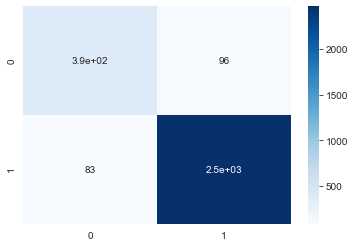

In [273]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="Blues")

As we could see above, when we use 30% of customers as test data and the same parameters as was mentioned above, we get accuracy score around 94%. In the heat map, we could see exactly the same what we see from the accuracy score.

Also, if you are interested in, you could discover structure of the decision tree, that was printed out in text form above.

### k-Nearest Neighbors

In this part, we will use the k-Nearest Neighbours algorith, with different hyperparameters.

First of all, we will try to use uniform weights, and by using for cycle, try to find out optimal number of neighbors.

In [275]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(1,21):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Number of neighbors = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: number of neighbors = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Number of neighbors = 1, score(mean, min, max): (0.8547422050887865, 0.7976307996051333, 0.910167818361303)
Number of neighbors = 2, score(mean, min, max): (0.8382528122549153, 0.7384007897334649, 0.910167818361303)
Number of neighbors = 3, score(mean, min, max): (0.8507276290957991, 0.7384007897334649, 0.924901185770751)
Number of neighbors = 4, score(mean, min, max): (0.8552125237524827, 0.7384007897334649, 0.9278656126482213)
Number of neighbors = 5, score(mean, min, max): (0.8596409131878465, 0.7384007897334649, 0.9278656126482213)
Number of neighbors = 6, score(mean, min, max): (0.8624123222872095, 0.7384007897334649, 0.9278656126482213)
Number of neighbors = 7, score(mean, min, max): (0.8654215414183652, 0.7384007897334649, 0.9278656126482213)
Number of neighbors = 8, score(mean, min, max): (0.8676661771476732, 0.7384007897334649, 0.932806324110672)
Number of neighbors = 9, score(mean, min, max): (0.8693570431123547, 0.7384007897334649, 0.932806324110672)
Number of neighbors = 10

In [277]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(1,101,5):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Number of neighbors = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: number of neighbors = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Number of neighbors = 1, score(mean, min, max): (0.8547422050887865, 0.7976307996051333, 0.910167818361303)
Number of neighbors = 6, score(mean, min, max): (0.8655057864364059, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 11, score(mean, min, max): (0.871462847280479, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 16, score(mean, min, max): (0.8742932782913039, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 21, score(mean, min, max): (0.8751226349940887, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 26, score(mean, min, max): (0.8758235982296028, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 31, score(mean, min, max): (0.8756895953953768, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 36, score(mean, min, max): (0.8756137358606886, 0.7976307996051333, 0.9239130434782609)
Number of neighbors = 41, score(mean, min, max): (0.8752914461582215, 0.7976307996051333, 0.9239130434782609)
Number of neig

As we could see, optimal number of neighbours for uniform weight, is from 20 to 25 (more does not give better results, and it's more difficult). The best accuracy score we got was around 87,6%, which is significantly less than what got from decision tree.

Now we will try the same experiments as above, but with distance weights.

In [278]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(1,21):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Number of neighbors = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: number of neighbors = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Number of neighbors = 1, score(mean, min, max): (0.8547422050887865, 0.7976307996051333, 0.910167818361303)
Number of neighbors = 2, score(mean, min, max): (0.8547422050887864, 0.7976307996051333, 0.910167818361303)
Number of neighbors = 3, score(mean, min, max): (0.8617205576517133, 0.7976307996051333, 0.924901185770751)
Number of neighbors = 4, score(mean, min, max): (0.865999369852003, 0.7976307996051333, 0.924901185770751)
Number of neighbors = 5, score(mean, min, max): (0.8683296395865605, 0.7976307996051333, 0.924901185770751)
Number of neighbors = 6, score(mean, min, max): (0.8704097067503224, 0.7976307996051333, 0.924901185770751)
Number of neighbors = 7, score(mean, min, max): (0.8722764423867474, 0.7976307996051333, 0.924901185770751)
Number of neighbors = 8, score(mean, min, max): (0.8737381920410161, 0.7976307996051333, 0.9258893280632411)
Number of neighbors = 9, score(mean, min, max): (0.8747763375633671, 0.7976307996051333, 0.9258893280632411)
Number of neighbors = 10, s

In [31]:
skf = StratifiedKFold(n_splits=10)
scores = list()
best_score_index = (0,0)

for i in range(1,101,5):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'Number of neighbors = {i}, score(mean, min, max): {np.mean(scores), np.min(scores), np.max(scores)}')
    if np.mean(scores) >= best_score_index[1]:
            best_score_index = (i, np.mean(scores))

print(f'Best result: number of neighbors = {best_score_index[0]}, mean of precision score = {best_score_index[1]}')

Number of neighbors = 1, score(mean, min, max): (0.8547422050887865, 0.7976307996051333, 0.910167818361303)
Number of neighbors = 6, score(mean, min, max): (0.8677761238289587, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 11, score(mean, min, max): (0.8730751547406769, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 16, score(mean, min, max): (0.8756507058437937, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 21, score(mean, min, max): (0.8767022579978071, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 26, score(mean, min, max): (0.8771893741050143, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 31, score(mean, min, max): (0.8772269642028001, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 36, score(mean, min, max): (0.8770700142222256, 0.7976307996051333, 0.9219367588932806)
Number of neighbors = 41, score(mean, min, max): (0.8767724131741902, 0.7976307996051333, 0.9219367588932806)
Number of nei

Again, we se that optimal number of neighbours is around 20, but again, the accuracy score is just around 87,9%, which is better than option with uniform weights, but still significantly worse than decision tree.

#### k-Nearest Neighbors summary

No meter how we set the parameters, by using decision tree (eve though it's easier and faster), we get better results. To sum up, we see that specifically for our data, k-Nearest Neighbors is not optimal algorithm.

### Multi-layer Perceptron (Neural Network)

Now, we will try different structures of network, different activation functions and so on. Our goal will be to beat the accuracy score, that we got by using decision tree.

Hidden layer should contain between 14 and 45 neurons, due to shape of data. Therefor, it does not make a sense to try numbers out of this range.

- Solver: adam
- Activation: relu
- Shape: 16

In [36]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='relu', hidden_layer_sizes=(16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8657453109575518,
 0.8854886475814413,
 0.9190523198420533,
 0.9249753208292202,
 0.9387956564659428,
 0.9338598223099703,
 0.9526159921026653,
 0.9634387351778656,
 0.8853754940711462,
 0.5395256916996047]

In [37]:
np.mean(scores), np.min(scores), np.max(scores)

(0.8808872991037463, 0.5395256916996047, 0.9634387351778656)

- Solver: adam
- Activation: relu
- Shape: 16,16

In [38]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='relu', hidden_layer_sizes=(16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8716683119447186,
 0.9022704837117473,
 0.9220138203356367,
 0.9526159921026653,
 0.9674234945705824,
 0.9644619940769991,
 0.9427443237907206,
 0.9881422924901185,
 0.8992094861660079,
 0.6393280632411067]

In [39]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9049878262430303, 0.6393280632411067, 0.9881422924901185)

- Solver: adam
- Activation: relu
- Shape: 16,16,16

In [69]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='relu', hidden_layer_sizes=(16,16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8519249753208292,
 0.9348469891411648,
 0.9131293188548865,
 0.9526159921026653,
 0.9595261599210266,
 0.9595261599210266,
 0.9407699901283317,
 0.9733201581027668,
 0.8843873517786561,
 0.6778656126482213]

In [70]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9047912707919574, 0.6778656126482213, 0.9733201581027668)

- Solver: adam
- Activation: relu
- Shape: 32

In [30]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='relu', hidden_layer_sizes=(32) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8479763079960513,
 0.8904244817374136,
 0.9151036525172754,
 0.9378084896347483,
 0.9536031589338598,
 0.9387956564659428,
 0.9437314906219151,
 0.967391304347826,
 0.8853754940711462,
 0.44367588932806323]

In [31]:
np.mean(scores), np.min(scores), np.max(scores)

(0.872388592565424, 0.44367588932806323, 0.967391304347826)

- Solver: adam
- Activation: relu
- Shape: 32,32

In [32]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='relu', hidden_layer_sizes=(32,32) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8450148075024679,
 0.9012833168805529,
 0.932872655478776,
 0.9427443237907206,
 0.9555774925962488,
 0.9654491609081934,
 0.9387956564659428,
 0.9841897233201581,
 0.8903162055335968,
 0.5820158102766798]

In [33]:
np.mean(scores), np.min(scores), np.max(scores)

(0.8938259152753337, 0.5820158102766798, 0.9841897233201581)

As we could see above, no meter what architecture of NN we use (number of hidden layers, number of neurons in layers), we always get approximately the same result, average accuracy score around 90,5% for 16 neurons in layer, and just around 88-89% for 32 neurons in layer, and that's worse than what we got from decision tree.

Now, we will use NN with one, two and three layers size 16, and try different solvers and activation functions to get the best possible result (and beat decision tree).

- Solver: adam
- Activation: identity
- Shape: 16 | 16,16 | 16,16,16

In [34]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='identity', hidden_layer_sizes=(16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8124383020730503,
 0.8262586377097729,
 0.8884501480750246,
 0.9131293188548865,
 0.930898321816387,
 0.9091806515301086,
 0.9190523198420533,
 0.9367588932806324,
 0.8893280632411067,
 0.7747035573122529]

In [35]:
np.mean(scores), np.min(scores), np.max(scores)

(0.8800198213735275, 0.7747035573122529, 0.9367588932806324)

In [36]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='identity', hidden_layer_sizes=(16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.7847976307996052,
 0.8341559723593287,
 0.8874629812438302,
 0.914116485686081,
 0.9338598223099703,
 0.910167818361303,
 0.9299111549851925,
 0.9367588932806324,
 0.8814229249011858,
 0.7816205533596838]

In [39]:
np.mean(scores), np.min(scores), np.max(scores)

(0.8794267409057743, 0.7816205533596838, 0.9348469891411648)

In [37]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='identity', hidden_layer_sizes=(16,16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8084896347482725,
 0.8292201382033564,
 0.8993089832181639,
 0.9081934846989141,
 0.9348469891411648,
 0.9072063178677197,
 0.914116485686081,
 0.9347826086956522,
 0.8764822134387352,
 0.7816205533596838]

In [38]:
np.mean(scores), np.min(scores), np.max(scores)

(0.8794267409057743, 0.7816205533596838, 0.9348469891411648)

As we could see, by using identity as activation function (making just linear combination), we get worse results, therefor this is not the correct way.

- Solver: adam
- Activation: logistic
- Shape: 16 | 16,16 | 16,16,16

In [40]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='logistic', hidden_layer_sizes=(16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8687068114511353,
 0.8726554787759131,
 0.9160908193484699,
 0.9358341559723593,
 0.9417571569595261,
 0.9239881539980257,
 0.9407699901283317,
 0.958498023715415,
 0.900197628458498,
 0.8211462450592886]

In [41]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9079644463866963, 0.8211462450592886, 0.958498023715415)

In [42]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='logistic', hidden_layer_sizes=(16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8558736426456071,
 0.8647581441263573,
 0.914116485686081,
 0.928923988153998,
 0.9387956564659428,
 0.9220138203356367,
 0.9397828232971372,
 0.9535573122529645,
 0.8843873517786561,
 0.9367588932806324]

In [43]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9138968118023014, 0.8558736426456071, 0.9535573122529645)

In [44]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='adam' ,activation='logistic', hidden_layer_sizes=(16,16,16) ,max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.8420533070088845,
 0.8637709772951628,
 0.914116485686081,
 0.9387956564659428,
 0.9358341559723593,
 0.9259624876604146,
 0.9397828232971372,
 0.9535573122529645,
 0.8873517786561265,
 0.8695652173913043]

In [45]:
np.mean(scores), np.min(scores), np.max(scores)

(0.9070790201686378, 0.8420533070088845, 0.9535573122529645)

As we could see, we get better results by using logistic function instead of relu function (even get to 91,4% as average accuracy score for 16,16 NN). That's closest to the results of decision tree we get till now. Last think we are going to try is using solver from family of quasi-Newton methods (lbfgs) and logistic function. Hopefully, we will finally be able to beat decision tree.

- Solver: lbfgs
- Activation: logistic
- Shape: 16

In [48]:
skf = StratifiedKFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(solver='lbfgs' ,activation='logistic', hidden_layer_sizes=(16) ,max_iter=6000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

C:\Users\tomuz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\tomuz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\tomuz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[0.8726554787759131,
 0.8923988153998026,
 0.9239881539980257,
 0.9397828232971372,
 0.9585389930898321,
 0.9684106614017769,
 0.9723593287265548,
 0.9841897233201581,
 0.8626482213438735,
 0.47035573122529645]

In [49]:
np.mean(scores), np.min(scores), np.max(scores)

(0.884532793057837, 0.47035573122529645, 0.9841897233201581)

Even after one first experiment, we see that even though we increase number of iterations, this solver still has problem with convergence (we get the expeptions). Therefor it does not make a sense to continue doing other experiments with this solver.

#### MLP classifier summary

After performing several experiments with different architecture of the neuron network, different solvers and different activation functions, we got the best results for neuron network with two hidden layers each consisting of 16 neurons, adam solver and logistic activation function. Over all, we found out that adam solver is probably the best option for specifically this data, and that we got better results by using logical activation function instead of relu.

## Results

For decision tree and k-Nearest Neighbors, we will put there just some results from tuning, because during the tuning, we tried various number of hyperparameters (using for loop), and it does not make a sense to mention them all.


| Algorithm           | Hyperparameters (just those diferend from default)                                 | Average accuracy score             |
|:--------------------|:-----------------------------------------------------------------------------------|:-----------------------------------|
| Decision tree       | min_samples_leaf = 1, criterion = 'gini'                                           | 90,96%                             |
| Decision tree       | min_samples_leaf = 10, criterion = 'gini'                                          | 91,4%                              |
| Decision tree       | min_samples_leaf = 90, criterion = 'gini'                                          | 91,74%                             |
| Decision tree       | min_samples_leaf = 25, criterion = 'entropy'                                       | 91,9%                              |
| k-Nearest Neighbors | n_neighbors=20, weights='uniform'                                                  | 87,6%                              |
| k-Nearest Neighbors | n_neighbors=26, weights='uniform'                                                  | 87,58%                             |
| k-Nearest Neighbors | n_neighbors=20, weights='distance'                                                 | 87,9%                              |
| k-Nearest Neighbors | n_neighbors=31, weights='distance'                                                 | 87,7%                              |
| MLP                 | solver='adam' ,activation='relu', hidden_layer_sizes=(16) ,max_iter=4000           | 88%                                |
| MLP                 | solver='adam' ,activation='relu', hidden_layer_sizes=(16,16) ,max_iter=4000        | 90,5%                              |
| MLP                 | solver='adam' ,activation='relu', hidden_layer_sizes=(16,16,16) ,max_iter=4000     | 90,48%                             |
| MLP                 | solver='adam' ,activation='relu', hidden_layer_sizes=(32) ,max_iter=4000           | 87,24%                             |
| MLP                 | solver='adam' ,activation='relu', hidden_layer_sizes=(32,32) ,max_iter=4000        | 89,38%                             |
| MLP                 | solver='adam' ,activation='identity', hidden_layer_sizes=(16) ,max_iter=4000       | 88%                                |
| MLP                 | solver='adam' ,activation='identity', hidden_layer_sizes=(16,16) ,max_iter=4000    | 87,94%                             |
| MLP                 | solver='adam' ,activation='identity', hidden_layer_sizes=(16,16,16) ,max_iter=4000 | 87,94%                             |
| MLP                 | solver='adam' ,activation='logistic', hidden_layer_sizes=(16) ,max_iter=4000       | 90,8%                              |
| MLP                 | solver='adam' ,activation='logistic', hidden_layer_sizes=(16,16) ,max_iter=4000    | 91,39%                             |
| MLP                 | solver='adam' ,activation='logistic', hidden_layer_sizes=(16,16,16) ,max_iter=4000 | 90,9%                              |
| MLP                 | solver='lbfgs' ,activation='logistic', hidden_layer_sizes=(16) ,max_iter=6000      | 88,45% - problems with convergence |

## Summary

After we prepare given data (transform categorical variables to numerical, min-max scaling), we perform several classification algorithms with various hyperparameters settings. From most of the experiments, we get average accuracy score (when using 10-fold validation) over 85%. Overall, we got the best result by using decision tree (around 92%). Closest to results of decision tree, we get by using a NN (around 91,4%), but the fitting of the model takes much longer time than building a decision tree, and even though it gives worse result.

To sum up, we find out that for our data, the best classification algorith is probably decision tree.

What is interesting from my point of view, is the fact that even though the decision tree algorithm is the most primitive one, it gave us in this case better results than other tested algorithms.